
Accuracy Score(Test Data) =  0.9

Accuracy Score(Train Data) =  0.7675585284280937

Precision Score =  0.7647058823529411

Recall Score =  0.5416666666666666

f1 Score =  0.6341463414634146

Confusion Matrix:

 [[122   4]
 [ 11  13]]

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.97      0.94       126
           1       0.76      0.54      0.63        24

    accuracy                           0.90       150
   macro avg       0.84      0.75      0.79       150
weighted avg       0.89      0.90      0.89       150



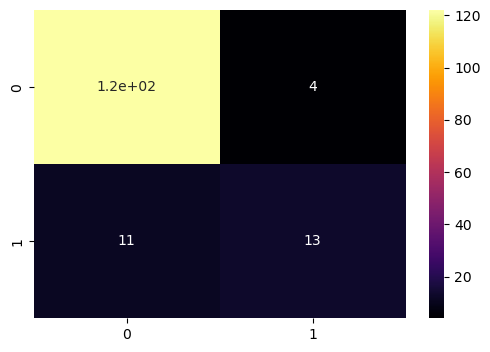

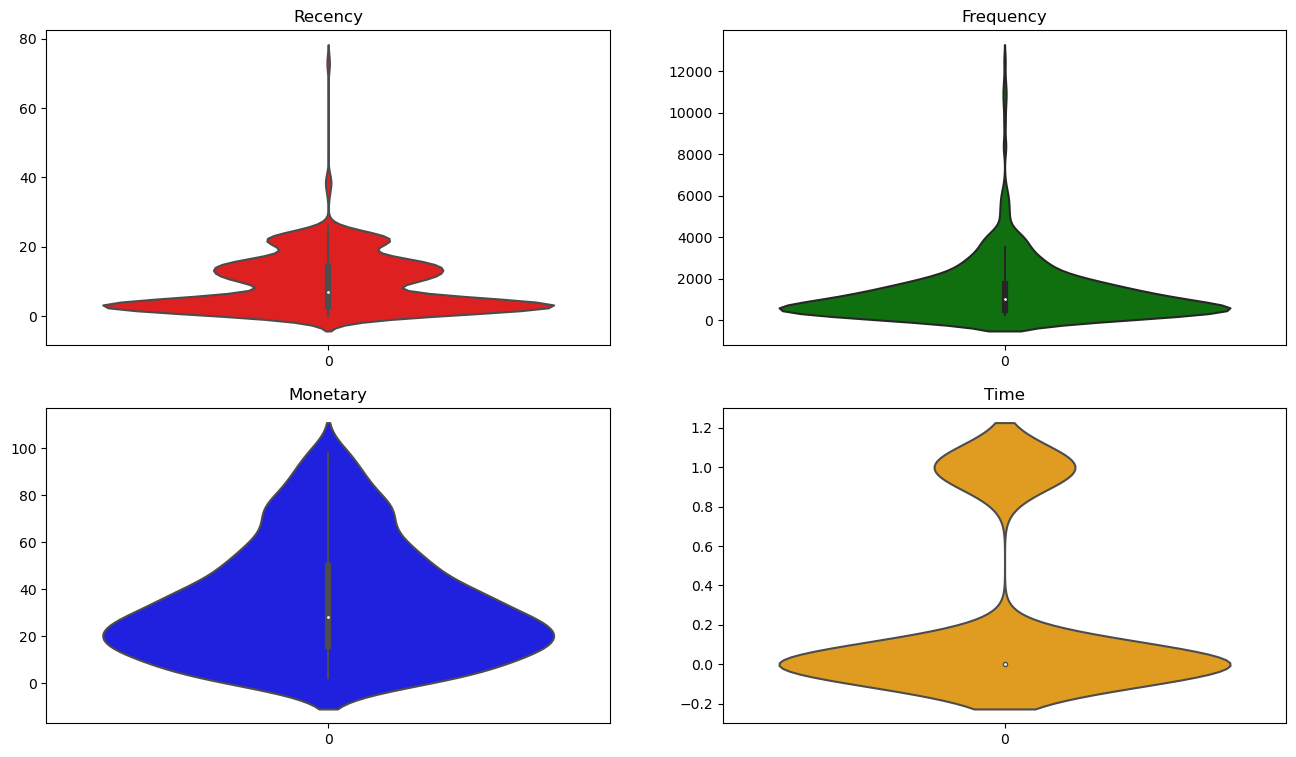


Recency:

  Statistic  Value
0      Mean    9.5
1    Median    7.0
2       Max   74.0
3       Min    0.0

Frequency:

  Statistic  Value
0      Mean    5.5
1    Median    4.0
2       Max   50.0
3       Min    1.0

Monetary:

  Statistic    Value
0      Mean   1378.6
1    Median   1000.0
2       Max  12500.0
3       Min    250.0

Time:

  Statistic  Value
0      Mean   34.2
1    Median   28.0
2       Max   98.0
3       Min    2.0


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ss = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 21, p = 2, metric = 'euclidean')
df = pd.read_csv('transfusion.csv')
x = df.drop('Frequency (times)', axis = 1, inplace = True)
y = df.iloc[:, 3]
x = df.iloc[:, 0:3]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 135)
X_train = ss.fit_transform(X_train)
model = knn.fit(X_train, y_train)
X_test = ss.transform(X_test)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print('\nAccuracy Score(Test Data) = ', accuracy_score(y_test, y_pred))
print('\nAccuracy Score(Train Data) = ', accuracy_score(y_train, y_train_pred))
print('\nPrecision Score = ', precision_score(y_test, y_pred))
print('\nRecall Score = ', recall_score(y_test, y_pred))
print('\nf1 Score = ', f1_score(y_test, y_pred))
print('\nConfusion Matrix:\n\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n\n', classification_report(y_test, y_pred))
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'inferno')
plt.show()
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 9))
sns.violinplot(df.iloc[:, 0], color = 'red', ax = axes[0, 0])
sns.violinplot(df.iloc[:, 1], color = 'green', ax = axes[0, 1])
sns.violinplot(df.iloc[:, 2], color = 'blue', ax = axes[1, 0])
sns.violinplot(df.iloc[:, 3], color = 'orange', ax = axes[1, 1])
axes[0, 0].set_title('Recency')
axes[0, 1].set_title('Frequency')
axes[1, 0].set_title('Monetary')
axes[1, 1].set_title('Time')
plt.show()
print('\nRecency:\n')
stats_recency = {'Mean':9.5, 'Median':7.0, 'Max':74, 'Min':0}
stats_recency = [{'Statistic': key, 'Value': value} for key, value in stats_recency.items()]
stats_recency = pd.DataFrame(stats_recency)
print(stats_recency)
print('\nFrequency:\n')
stats_frequency = {'Mean':5.5, 'Median':4.0, 'Max':50, 'Min':1}
stats_frequency = [{'Statistic': key, 'Value': value} for key, value in stats_frequency.items()]
stats_frequency = pd.DataFrame(stats_frequency)
print(stats_frequency)
print('\nMonetary:\n')
stats_monetary = {'Mean':1378.6, 'Median':1000, 'Max':12500, 'Min':250}
stats_monetary = [{'Statistic': key, 'Value': value} for key, value in stats_monetary.items()]
stats_monetary = pd.DataFrame(stats_monetary)
print(stats_monetary)
print('\nTime:\n')
stats_time = {'Mean':34.2, 'Median':28, 'Max':98, 'Min':2}
stats_time = [{'Statistic': key, 'Value': value} for key, value in stats_time.items()]
stats_time = pd.DataFrame(stats_time)
print(stats_time)